# Image Similarity Techniques

In [1]:
# Import the necessary packages and dataset
import warnings
warnings.filterwarnings ("ignore")

from keras.datasets import fashion_mnist
import numpy as np

In [2]:
(x_trg, y_trg), (x_test_org, y_test_org) = fashion_mnist.load_data()
print("Original dimensions of training set is: ", x_trg.shape)
print("Original dimensions of test set is: ", x_test_org.shape)

Original dimensions of training set is:  (60000, 28, 28)
Original dimensions of test set is:  (10000, 28, 28)


In [3]:
# Converting to new dimensions
x_test = np.reshape(x_test_org, (10000, 784))
print("New dimensions of test set is: ", x_test.shape)

New dimensions of test set is:  (10000, 784)


#### Cosine Similarity

In [4]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
cos_sim = cosine_similarity(x_test)
print("The shape of the matrix is: ", cos_sim.shape)
print("\n")
print("Details of cosine similarity: \n", cos_sim)

The shape of the matrix is:  (10000, 10000)


Details of cosine similarity: 
 [[1.         0.53737176 0.29959086 ... 0.41691091 0.29104272 0.75233371]
 [0.53737176 1.         0.57679881 ... 0.51693626 0.5259895  0.60401192]
 [0.29959086 0.57679881 1.         ... 0.5212979  0.77687777 0.38123159]
 ...
 [0.41691091 0.51693626 0.5212979  ... 1.         0.46994367 0.38640914]
 [0.29104272 0.5259895  0.77687777 ... 0.46994367 1.         0.3511436 ]
 [0.75233371 0.60401192 0.38123159 ... 0.38640914 0.3511436  1.        ]]


In [6]:
# Converting to a dataframe
cosine_df = pd.DataFrame(cos_sim)
print(cosine_df)
print("\n")
print("Shape of the dataframe is: ", cosine_df.shape)

          0         1         2         3         4         5         6     \
0     1.000000  0.537372  0.299591  0.254649  0.555361  0.297692  0.309707   
1     0.537372  1.000000  0.576799  0.545639  0.841516  0.592099  0.594745   
2     0.299591  0.576799  1.000000  0.865599  0.627106  0.906102  0.419301   
3     0.254649  0.545639  0.865599  1.000000  0.578542  0.750548  0.410611   
4     0.555361  0.841516  0.627106  0.578542  1.000000  0.657607  0.570147   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.798158  0.639388  0.398348  0.353610  0.659352  0.405944  0.365798   
9996  0.247718  0.518909  0.734896  0.816223  0.524992  0.644245  0.387917   
9997  0.416911  0.516936  0.521298  0.497690  0.574657  0.538780  0.485490   
9998  0.291043  0.525989  0.776878  0.824848  0.564886  0.673214  0.368430   
9999  0.752334  0.604012  0.381232  0.301489  0.583261  0.389066  0.389948   

          7         8         9     ...      9990      9991    

In [7]:
# Check the information
prod_info = cosine_df.iloc[245].values
print("Cosine Similarity Information of the product is: \n", prod_info)

Cosine Similarity Information of the product is: 
 [0.73391198 0.72703189 0.4878277  ... 0.46116883 0.46004688 0.76807936]


In [8]:
# Import the necessary package to display the product
from skimage.io import imread, imshow

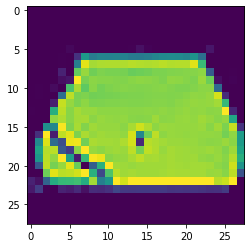

In [9]:
# Display the image of the product
plt.imshow(x_test_org[245])

In [10]:
# Display the index of 10 similar products
similar_images_index = np.argsort(-prod_info)[0:10]
print("Indexes of similar images are: \n", similar_images_index)

Indexes of similar images are: 
 [ 245 8361 3602 9229 9404 7240 1103 3213 8143 6497]


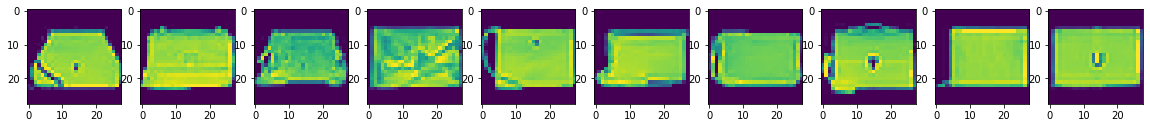

In [11]:
# Display the images of 10 similar products
plt.figure(1, figsize = (20,100))

for i in range(0,10):
    plt.subplot(1,10, i+1)
    plt.imshow(x_test_org[similar_images_index[i]])
    
plt.show()

#### Euclidean Distances

In [12]:
# Importing the necessary packages
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
# Data understanding
euc_similarity = euclidean_distances(x_test)
print("The shape of the matrix is: ", euc_similarity.shape)

The shape of the matrix is:  (10000, 10000)


In [14]:
# Converting into a dataframe
euc_df = pd.DataFrame(euc_similarity)
print(euc_df)
print("\n")
print("Shape of the dataframe is: ", euc_df.shape)

             0            1            2            3            4     \
0        0.000000  4052.726736  3458.619089  2913.005493  2497.009612   
1     4052.726736     0.000000  3962.159260  4017.010953  2826.276880   
2     3458.619089  3962.159260     0.000000  1745.257861  2744.832417   
3     2913.005493  4017.010953  1745.257861     0.000000  2501.913668   
4     2497.009612  2826.276880  2744.832417  2501.913668     0.000000   
...           ...          ...          ...          ...          ...   
9995  2062.348661  3695.486977  3693.119007  3400.508638  2613.303465   
9996  2534.320422  4148.160556  2383.151275  1458.044238  2485.184299   
9997  2588.439684  4101.742313  2980.204691  2511.460332  2518.463619   
9998  3054.001801  4085.469985  2135.887403  1599.544310  2663.904278   
9999  1495.746636  4033.572858  3139.059095  2525.901621  2355.384257   

             5            6            7            8            9     ...  \
0     3269.912384  2475.951736  2432.112251  

In [15]:
# Determine the information about the product
euc_prod_info = euc_df.iloc[640].values
print("Euclidean Distances with other product is: \n", euc_prod_info)

Euclidean Distances with other product is: 
 [1896.17404264 4018.04529591 3487.4345872  ... 2907.67914323 3117.10041545
 1698.45930184]


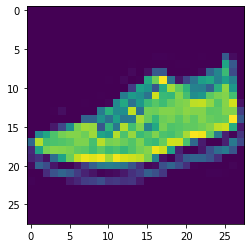

In [16]:
# Display the image of product
plt.imshow(x_test_org[640])

In [17]:
# Display the index of 10 similar products
euc_similar_images_index = np.argsort(euc_prod_info)[0:10]
print("Index of similar images are: \n", euc_similar_images_index)

Index of similar images are: 
 [ 640  412  746 7761 1461 2502 8971  448 2651  944]


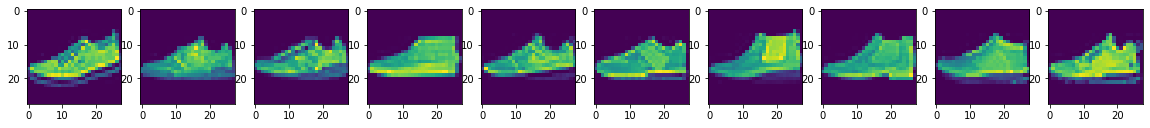

In [18]:
# Display the images of 10 similar products
plt.figure(1, figsize = (20,100))

for i in range(0,10):
    plt.subplot(1,10, i+1)
    plt.imshow(x_test_org[euc_similar_images_index[i]])
    
plt.show()

#### Manhattan Distances

In [19]:
# Import the necessary package
from sklearn.metrics.pairwise import manhattan_distances

In [20]:
# Data Understanding
man_sim = manhattan_distances(x_test)
print("The shape of the matrix is: ", man_sim.shape)

The shape of the matrix is:  (10000, 10000)


In [21]:
# Converting into a dataframe
man_df = pd.DataFrame(man_sim)
print(man_df)
print("\n")
print("Shape of the dataframe is: ", man_df.shape)

         0        1        2        3        4        5        6        7     \
0         0.0  83718.0  64230.0  52475.0  50157.0  61705.0  45111.0  48604.0   
1     83718.0      0.0  74808.0  79515.0  60895.0  75205.0  81045.0  66914.0   
2     64230.0  74808.0      0.0  23713.0  57965.0  18713.0  54959.0  56124.0   
3     52475.0  79515.0  23713.0      0.0  49450.0  30394.0  41712.0  46653.0   
4     50157.0  60895.0  57965.0  49450.0      0.0  51352.0  48474.0  35855.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
9995  29776.0  72708.0  71562.0  66157.0  55359.0  69581.0  63341.0  58116.0   
9996  44452.0  85252.0  35492.0  19059.0  48861.0  38503.0  33571.0  41674.0   
9997  43202.0  82314.0  47900.0  39169.0  51259.0  44129.0  38839.0  47208.0   
9998  55089.0  79825.0  27379.0  20272.0  55738.0  34296.0  48056.0  50171.0   
9999  22634.0  84176.0  57220.0  44311.0  48219.0  53975.0  32989.0  39222.0   

         8        9     ...     9990   

In [22]:
# Determine the information about the product
man_prod_info = man_df.iloc[640].values
print("Manhattan Distances with other product is: \n", man_prod_info)

Manhattan Distances with other product is: 
 [27818. 81174. 63916. ... 50438. 54663. 25892.]


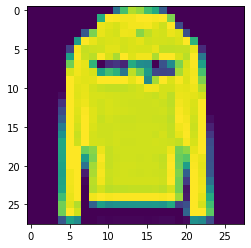

In [23]:
# Display the image of the product
plt.imshow(x_test_org[750])

In [24]:
# Display the index of 10 similar products
man_similar_images_index = np.argsort(man_prod_info)[0:10]
print("Index of similar images: \n", man_similar_images_index)

Index of similar images: 
 [ 640 7761 2996 5723  944  412  746 1461 2502 8972]


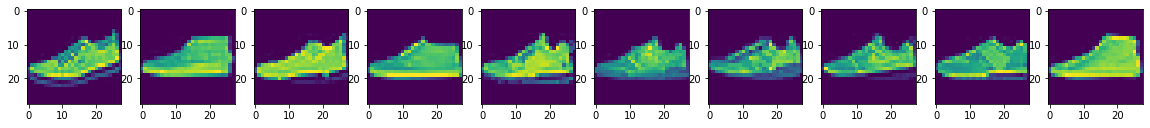

In [26]:
# Display the images of 10 similar products
plt.figure(1, figsize = (20,100))

for i in range(0,10):
    plt.subplot(1,10, i+1)
    plt.imshow(x_test_org[man_similar_images_index[i]])
    
plt.show()